# Schrodinger's Equation

### Schrodinger Equation

$$\frac{-\hbar ^2}{2m} \frac{\partial ^2 \psi (r, t)}{\partial r^2} + V(r)\psi (r, t) = i\hbar \frac{\partial \psi (r, t)}{\partial t}$$

### Schrodinger Difference Equation
Assuming $\psi (r, t)$ = R + I _i_ (as it must be a complex number with a imaginary part) and considering only a one dimensional problem (x) we arrive at:

$$ I_{x, t+1} = \frac{\hbar \Delta t}{2m\Delta x^2}(R_{x+1, t} + R_{x-1, t} - 2R_{x, t}) - \frac{V(x)R_{x, t}\Delta t}{\hbar} + I_{x, t}$$

$$ R_{x, t+1} = \frac{\hbar \Delta t}{2m\Delta x^2}(I_{x+1, t} + I_{x-1, t} - 2I_{x, t}) - \frac{V(x)I_{x, t}\Delta t}{\hbar} + R_{x, t}$$

In [4]:
%matplotlib inline

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML, Image

In [7]:
def normalize(v):
    norm=np.linalg.norm(v, ord=2)
    if norm==0:
        return v
    return v/norm

In [15]:
# ------------- Constants ------------- #

h  = 1 #1.054 * (10**-34) # J.s (Planck's Reduced Constant)
dx = 0.1
dt = 0.0001
L  = 5                # m (Width)
m  = 1 #9.109 * (10**-31) # kg (Electron's mass)

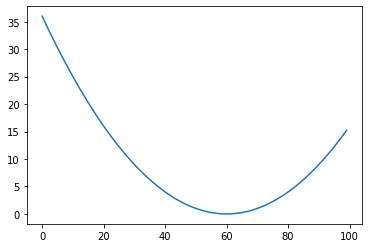

In [16]:
# ---------------------- Potential Function ---------------------- #

center = 1

def V(x):
    return (x-center)**2

v = [V(i/10) for i in range(-int(L/dx),int(L/dx))]

plt.plot(v)
plt.show()

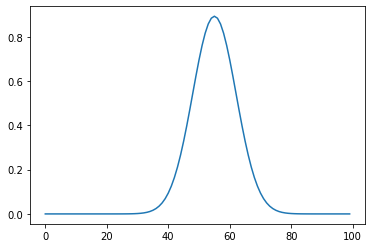

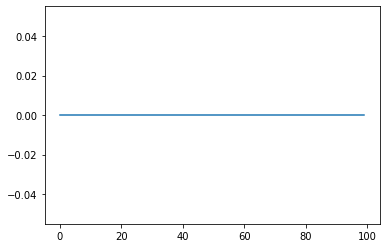

In [17]:
# ------------------ Initial Conditions ------------------ #

def R(x):
    return np.exp(-(x-0.5)**2)/np.sqrt(1.25323)

def I(x):
    return 0

r = [R(y/10) for y in range(-int(L/dx),int(L/dx))]
i = [I(y/10) for y in range(-int(L/dx),int(L/dx))]

plt.plot(r)
plt.show()

plt.plot(i)
plt.show()

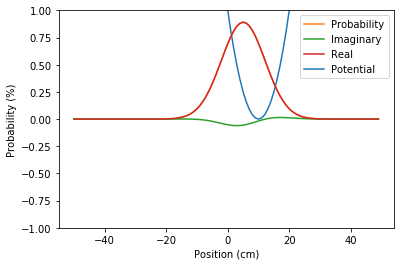

In [18]:
# ---------------------- Iterations ---------------------- #

x_max  = len(v)-1
next_r = [j for j in r]
next_i = [j for j in i]
u      = [(next_i[j]**2+next_r[j]**2)**(1/2) for j, t in enumerate(r)]

u = normalize(u)
next_i = normalize(next_i)
next_r = normalize(next_r)

k = (h*dt)/(dx*dx*2*m)
l = dt/h

fig, ax = plt.subplots()
interval = np.arange(-L/dx, L/dx)
zero = [0 for i in interval]
pot, = ax.plot(interval, u, label='Potential')
pot.set_ydata(v)
line, = ax.plot(interval, u, label='Probability')
linei, = ax.plot(interval, i, label='Imaginary')
liner, = ax.plot(interval, r, label='Real')
ax.set_xlabel("Position (cm)")
ax.set_ylabel("Probability (%)")
plt.legend([line, linei, liner, pot], ['Probability', 'Imaginary', 'Real', 'Potential'])
axes = plt.gca()
axes.set_ylim([-1,1])

def animate(t):
    global next_i
    global next_r
    global r
    global i
    global u
    for j in range(1, x_max):
        next_r[j] = -k*(i[j+1] + i[j-1] - 2*i[j]) + (l*v[j]*i[j]) + r[j]
        next_i[j] = k*(r[j+1] + r[j-1] - 2*r[j]) - (l*v[j]*r[j]) + i[j]
        u[j] = (next_i[j]**2 + next_r[j]**2)**(1/2)
    next_r[0] = next_r[1]
    next_r[x_max] = next_r[x_max-1]
    next_i[0] = next_i[1]
    next_i[x_max] = next_i[x_max-1]
    u[0] = u[1]
    u[x_max] = u[x_max-1]
    line.set_ydata(u)
    liner.set_ydata(next_r)
    linei.set_ydata(next_i)
    r = [y for y in next_r]
    i = [y for y in next_i]
    return liner,

ani = animation.FuncAnimation(fig, animate, interval=1, frames=500)
rc('animation', html='html5')
ani.save('animation.gif', writer='imagemagick')